## Black Friday Sales Analysis

### About Dataset 

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summaries of various customers for selected high-volume products from last month. The data set also contains customer demographics (age, gender, marital status, city type, stay in the current city), product details (productid and product category) and Total purchase amount from last month.

Now, they want to build a model to predict the purchase amount of customers against various products which will help them to create a personalized offer for customers against different products.

### Tasks to perform

The purchase column is the Target Variable, perform Univariate Analysis and Bivariate Analysis w.r.t the Purchase.

Masked in the column description means already converted from categorical value to numerical column.

Below mentioned points are just given to get you started with the dataset, not mandatory to follow the same sequence.

DATA PREPROCESSING

Check the basic statistics of the dataset

Check for missing values in the data

Check for unique values in data

Perform EDA

Purchase Distribution

Check for outliers

Analysis by Gender, Marital Status, occupation, occupation vs purchase, purchase by city, purchase by age group, etc

Drop unnecessary fields

Convert categorical data into integer using map function (e.g 'Gender' column)

Missing value treatment

Rename columns

Fill nan values

map range variables into integers (e.g 'Age' column)

Data Visualisation

visualize individual column Age vs Purchased Occupation vs Purchased Productcategory1 vs Purchased Productcategory2 vs Purchased Productcategory3 vs Purchased City category pie chart check for more possible plots

In [2]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerBase
from matplotlib.text import Text
import seaborn as sns


In [3]:
#load the dataset
df = pd.read_csv("BlackFriday.csv")

In [4]:
df.shape

(537577, 12)

In [5]:
#Description of the data sets
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [6]:
#View first few records
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [7]:
#view last few records
df.tail()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.0,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.0,16.0,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.0,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172
537576,1004737,P00118242,M,36-45,16,C,1,0,5,8.0,NaN,6875


In [8]:
#Look at the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


### Data Analysis##

In [9]:
df.duplicated().value_counts()

False    537577
Name: count, dtype: int64

In [10]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [11]:
df.rename(columns=str.lower,inplace=True) 
# Converting all the column names into lower case for easy usability

In [12]:
df.columns

Index(['user_id', 'product_id', 'gender', 'age', 'occupation', 'city_category',
       'stay_in_current_city_years', 'marital_status', 'product_category_1',
       'product_category_2', 'product_category_3', 'purchase'],
      dtype='object')

In [13]:
# user_id:

df.user_id

0         1000001
1         1000001
2         1000001
3         1000001
4         1000002
           ...   
537572    1004737
537573    1004737
537574    1004737
537575    1004737
537576    1004737
Name: user_id, Length: 537577, dtype: int64

In [14]:
# product_id:

df.product_id

0         P00069042
1         P00248942
2         P00087842
3         P00085442
4         P00285442
            ...    
537572    P00193542
537573    P00111142
537574    P00345942
537575    P00285842
537576    P00118242
Name: product_id, Length: 537577, dtype: object

In [15]:
# gender:

df.gender.unique()

array(['F', 'M'], dtype=object)

In [16]:
# age:

df.age.unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [17]:
# occupation:

df.occupation.unique(),len(df.occupation.unique()),df.occupation.dtype

(array([10, 16, 15,  7, 20,  9,  1, 12, 17,  0,  3,  4, 11,  8, 19,  2, 18,
         5, 14, 13,  6], dtype=int64),
 21,
 dtype('int64'))

In [18]:
# city_category:

df.city_category.unique()

array(['A', 'C', 'B'], dtype=object)

In [19]:
# stay_in_current_city_years:

df.stay_in_current_city_years.unique()

array(['2', '4+', '3', '1', '0'], dtype=object)

In [20]:
df.stay_in_current_city_years=df.stay_in_current_city_years.replace("4+",'4').astype(int)
df.stay_in_current_city_years.unique()

array([2, 4, 3, 1, 0])

In [21]:
# marital_status:

df.marital_status.unique()

array([0, 1], dtype=int64)

In [22]:
# product_category:

df.head(2)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [23]:
df[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  537577 non-null  int64  
 1   product_category_2  370591 non-null  float64
 2   product_category_3  164278 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 12.3 MB


In [24]:
df.head(2)

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200


In [25]:
df.product_category_1.unique()

array([ 3,  1, 12,  8,  5,  4,  2,  6, 14, 11, 13, 15,  7, 16, 18, 10, 17,
        9], dtype=int64)

In [26]:
#mode gives us a most repeated value

a=df.groupby('age')['product_category_2'].agg(pd.Series.mode)
b=df.groupby('age')['product_category_3'].agg(pd.Series.mode)
c=df.groupby('occupation')['product_category_2'].agg(pd.Series.mode)
d=df.groupby('occupation')['product_category_3'].agg(pd.Series.mode)


In [27]:
a,b,c,d

(age
 0-17     4.0
 18-25    8.0
 26-35    8.0
 36-45    8.0
 46-50    8.0
 51-55    8.0
 55+      8.0
 Name: product_category_2, dtype: float64,
 age
 0-17     16.0
 18-25    16.0
 26-35    16.0
 36-45    16.0
 46-50    16.0
 51-55    16.0
 55+      16.0
 Name: product_category_3, dtype: float64,
 occupation
 0      8.0
 1      8.0
 2      8.0
 3      8.0
 4      8.0
 5      8.0
 6      8.0
 7      8.0
 8      2.0
 9     14.0
 10     4.0
 11     8.0
 12     2.0
 13     8.0
 14     8.0
 15     8.0
 16     8.0
 17     2.0
 18     8.0
 19     8.0
 20     8.0
 Name: product_category_2, dtype: float64,
 occupation
 0     16.0
 1     16.0
 2     16.0
 3     16.0
 4     16.0
 5     16.0
 6     16.0
 7     16.0
 8     15.0
 9     16.0
 10    16.0
 11    16.0
 12    15.0
 13    16.0
 14    16.0
 15    16.0
 16    16.0
 17    15.0
 18    16.0
 19    16.0
 20    16.0
 Name: product_category_3, dtype: float64)

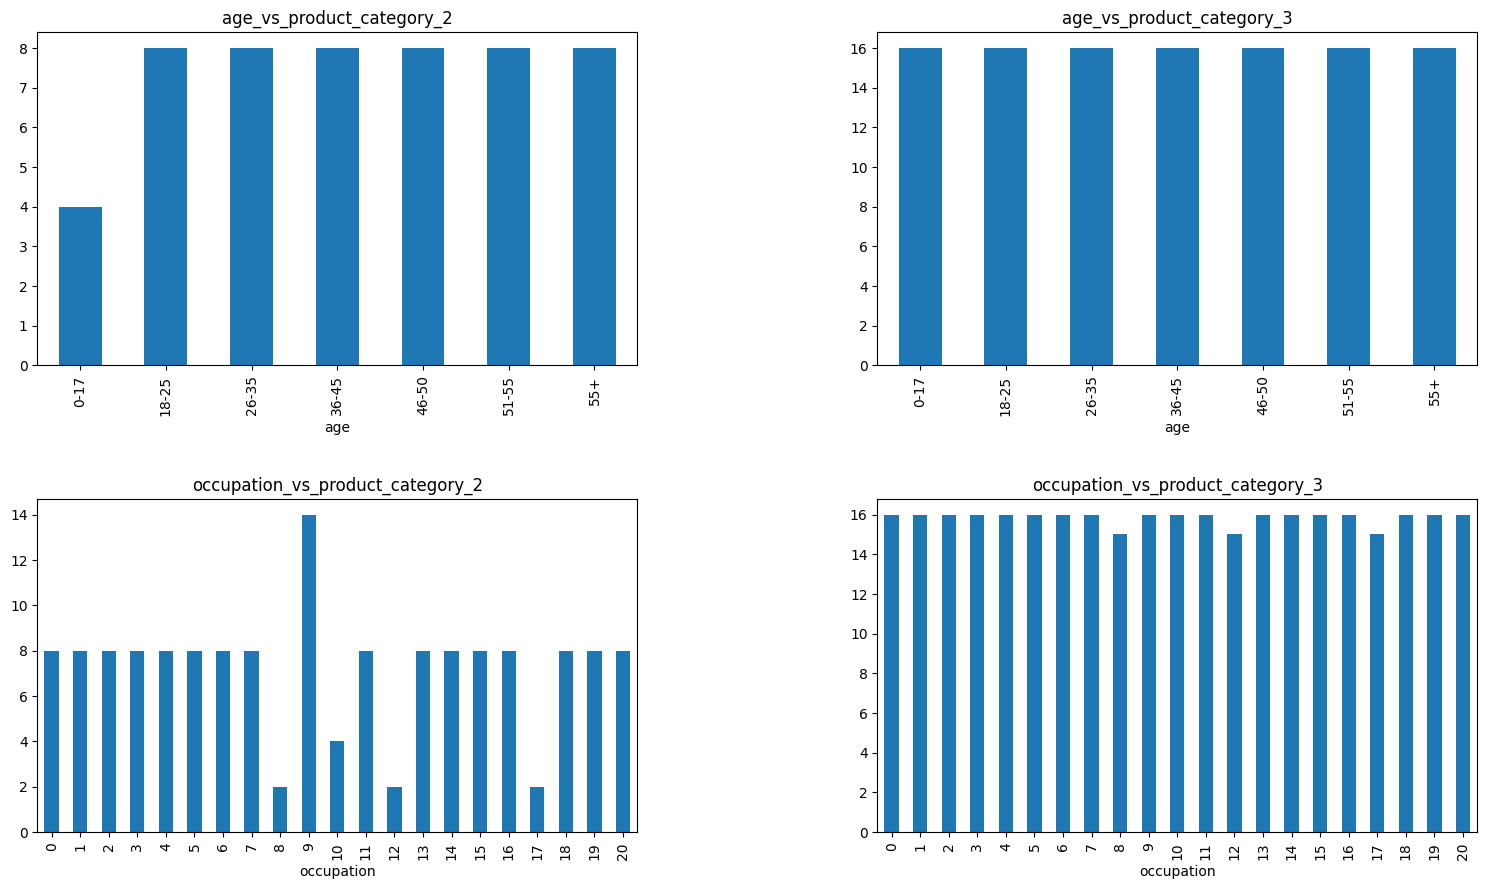

In [28]:
plt.figure(figsize=(18,10))
plt.subplots_adjust(left=0.1,
                   bottom=0.1,
                   right=0.9,
                   top=0.9,
                   wspace=0.4,
                   hspace=0.4)
plt.subplot(2,2,1)
a.plot(kind='bar',title="age_vs_product_category_2")
plt.subplot(2,2,2)
b.plot(kind='bar',title="age_vs_product_category_3")
plt.subplot(2,2,3)
c.plot(kind='bar',title="occupation_vs_product_category_2")
plt.subplot(2,2,4)
d.plot(kind='bar',title="occupation_vs_product_category_3")
plt.show()

In [29]:
def fill_nan_category(category_column) :
    x= df.groupby('occupation')[category_column].agg(pd.Series.mode)
    for i,j in zip(x.index,x):
       df.loc[df['occupation']==i,category_column]=df.loc[df['occupation']==i,category_column].fillna(j)

In [30]:
fill_nan_category('product_category_1')
fill_nan_category('product_category_2')
fill_nan_category('product_category_3')
df.product_category_1=df.product_category_1.astype(float)

In [31]:
df[['product_category_1','product_category_2','product_category_3']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   product_category_1  537577 non-null  float64
 1   product_category_2  537577 non-null  float64
 2   product_category_3  537577 non-null  float64
dtypes: float64(3)
memory usage: 12.3 MB


In [32]:
df.product_category_2.isnull().sum()

0

In [33]:
df.product_category_3.isnull().sum()

0

In [34]:
# purchase:

df.purchase.unique(),df.purchase.isnull().count()

(array([ 8370, 15200,  1422, ..., 14539, 11120, 18426], dtype=int64), 537577)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   user_id                     537577 non-null  int64  
 1   product_id                  537577 non-null  object 
 2   gender                      537577 non-null  object 
 3   age                         537577 non-null  object 
 4   occupation                  537577 non-null  int64  
 5   city_category               537577 non-null  object 
 6   stay_in_current_city_years  537577 non-null  int32  
 7   marital_status              537577 non-null  int64  
 8   product_category_1          537577 non-null  float64
 9   product_category_2          537577 non-null  float64
 10  product_category_3          537577 non-null  float64
 11  purchase                    537577 non-null  int64  
dtypes: float64(3), int32(1), int64(4), object(4)
memory usage: 47.2+ MB


In [36]:
df.head()

,user_id,product_id,gender,age,occupation,city_category,stay_in_current_city_years,marital_status,product_category_1,product_category_2,product_category_3,purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3.0,4.0,16.0,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1.0,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12.0,4.0,16.0,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12.0,14.0,16.0,1057
4,1000002,P00285442,M,55+,16,C,4,0,8.0,8.0,16.0,7969


## Data Visualization

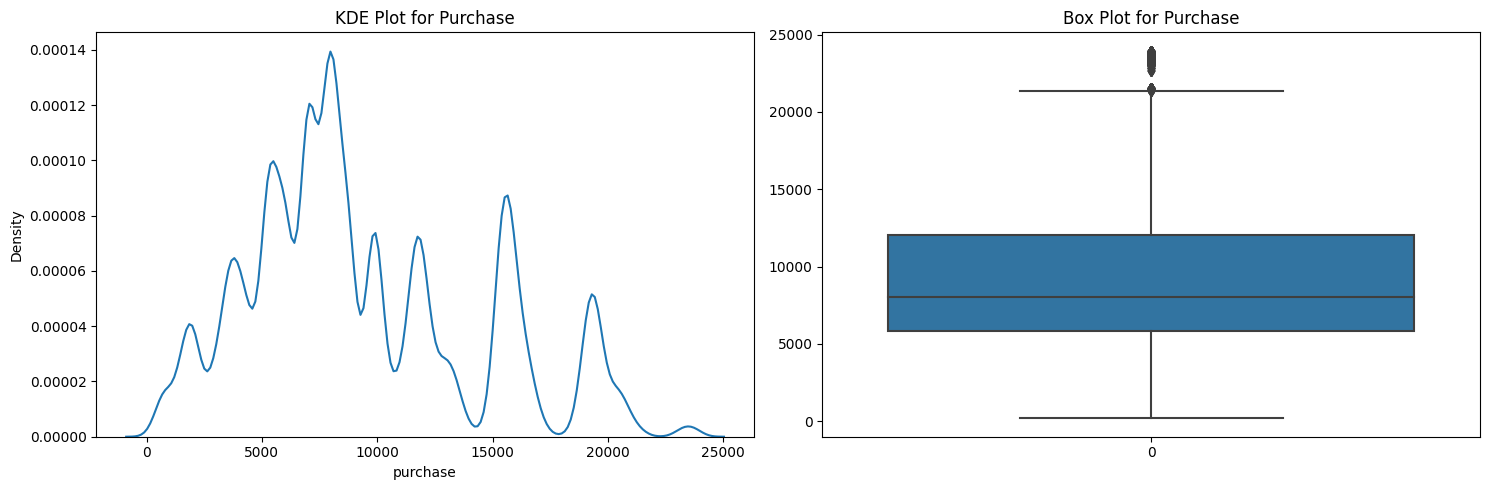

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

# Subplot 1: KDE plot
plt.subplot(121)  
sns.kdeplot(data=df['purchase'])
plt.title('KDE Plot for Purchase')

# Subplot 2: Box plot
plt.subplot(122)  
sns.boxplot(data=df['purchase'])
plt.title('Box Plot for Purchase')

# Automatically adjust subplot parameters for better layout
plt.tight_layout()  
plt.show()

Get purchase details of Male and Female customers? {'M','F'}

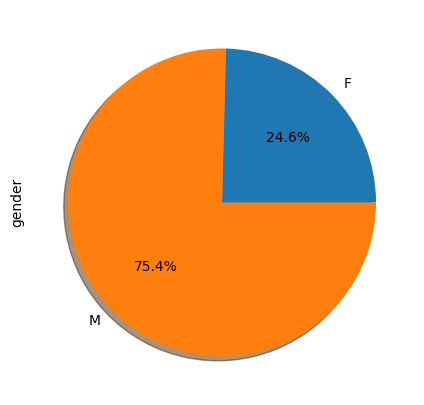

In [38]:
df.groupby('gender').agg({'gender':'count'}).gender.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

Purchase Distribution of 'Male' and 'Female' customers.

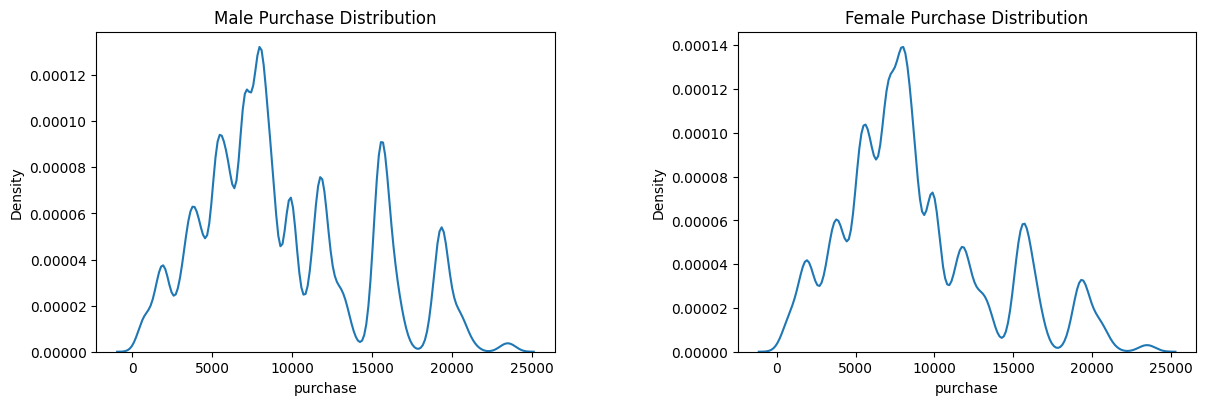

In [39]:
# Filter data for males and females
males = df[df['gender'] == 'M']
females = df[df['gender'] == 'F']

# Create a figure with two subplots
plt.figure(figsize=(10, 4))
plt.subplots_adjust(left=0.1, right=1.2, bottom=0.1, top=0.9, wspace=0.4, hspace=0.4)

# Subplot 1: KDE plot for males
plt.subplot(1, 2, 1)
sns.kdeplot(males['purchase'])
plt.title('Male Purchase Distribution')

# Subplot 2: KDE plot for females
plt.subplot(1, 2, 2)
sns.kdeplot(females['purchase'])
plt.title('Female Purchase Distribution')

plt.show()

Find which kind of customer purchasing more ? Male or Female?{'M','F'}

,gender,purchase
0,F,1164624021
1,M,3853044357


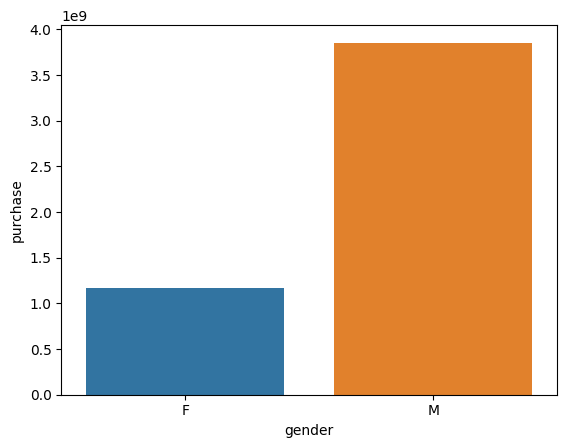

In [40]:
p=df.groupby('gender').agg({'purchase':sum}).reset_index()
sns.barplot(x='gender',y='purchase',data=p)
p

Find which Product customer buying most by seeing product_id.

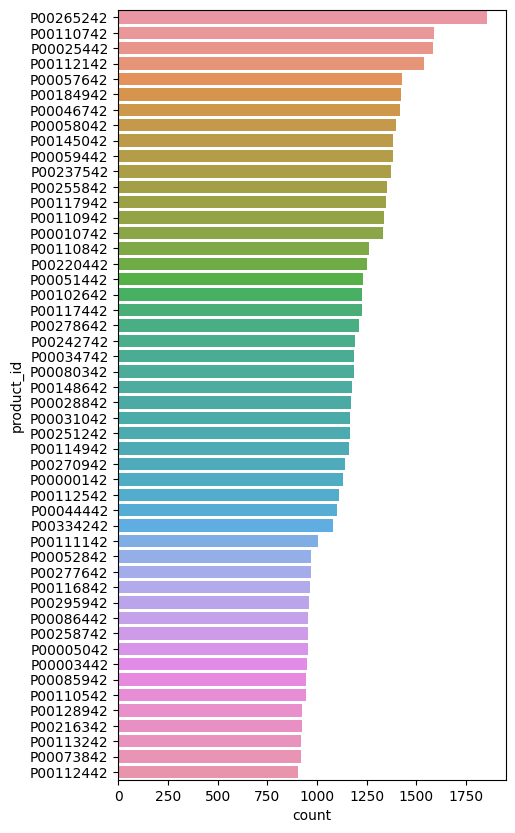

In [41]:
p_id=df.value_counts('product_id').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

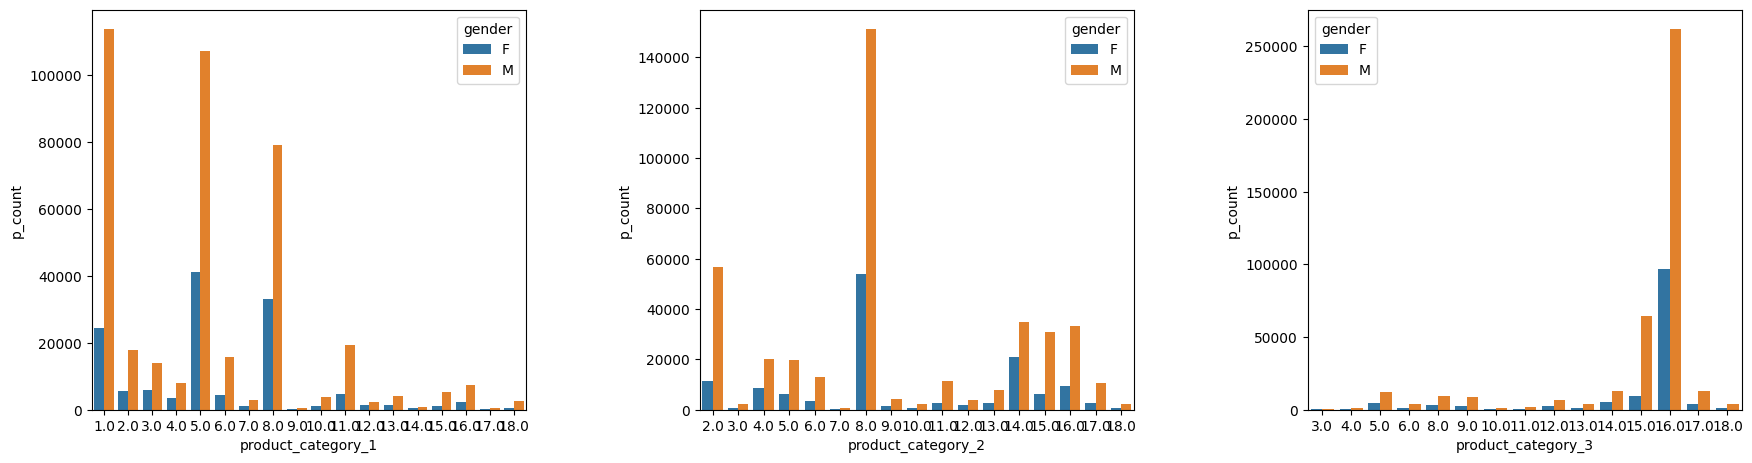

In [42]:
# Group and count product categories by gender
category_cols = ['product_category_1', 'product_category_2', 'product_category_3']
category_data = []

for category_col in category_cols:
    category_count = df.groupby('gender')[category_col].value_counts().rename('p_count').reset_index()
    category_data.append(category_count)

# Create subplots
plt.figure(figsize=(15, 5))
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.4, hspace=0.4)

for i, category_col in enumerate(category_cols):
    plt.subplot(1, 3, i + 1)
    sns.barplot(x=category_col, y='p_count', hue='gender', data=category_data[i])

plt.show()

Get purchase details of 'Married' and 'UnMarried' customers.{'UnMarried': 0, 'Married': 1}

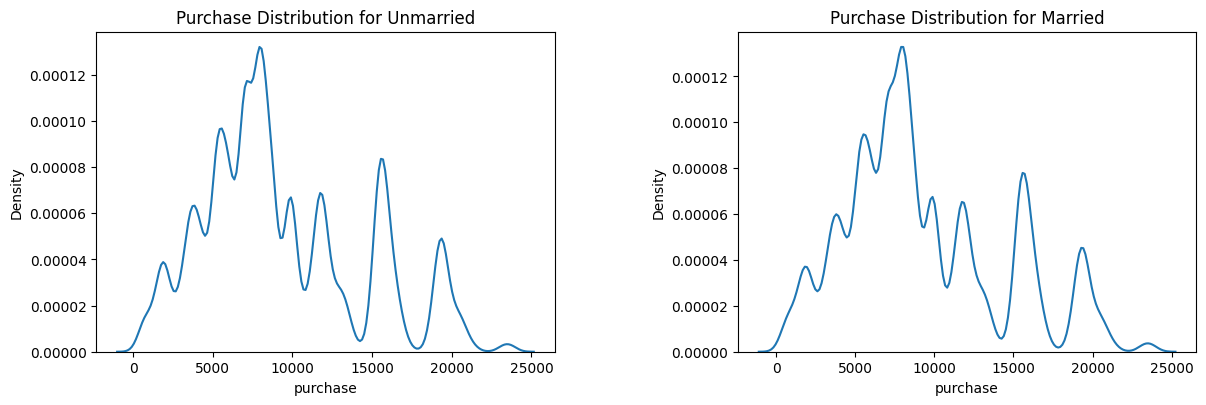

In [43]:
# Filter data for unmarried and married individuals
UM_P = df[df['marital_status'] == 0]['purchase']
M_P = df[df['marital_status'] == 1]['purchase']

# Create a figure with two subplots
plt.figure(figsize=(10, 4))
plt.subplots_adjust(left=0.1, bottom=0.1, right=1.2, top=0.9, wspace=0.4, hspace=0.4)

# Subplot 1: KDE plot for unmarried
plt.subplot(1, 2, 1)
sns.kdeplot(UM_P)
plt.title('Purchase Distribution for Unmarried')

# Subplot 2: KDE plot for married
plt.subplot(1, 2, 2)
sns.kdeplot(M_P)
plt.title('Purchase Distribution for Married')

plt.show()

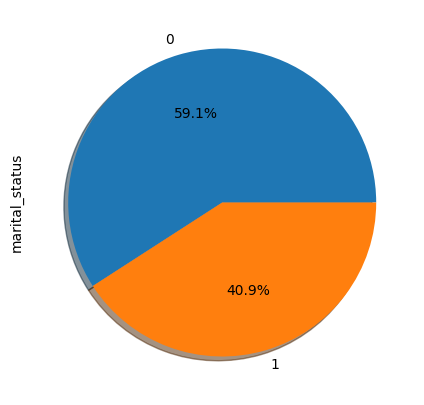

In [44]:
df.groupby('marital_status').agg({'marital_status':'count'}).marital_status.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

 Find which customer purchasing more (Married or UnMarried) and Top 10 products purcahsed by them.

,gender,marital_status,purchase
0,F,0,673815717
1,F,1,490808304
2,M,0,2292473783
3,M,1,1560570574


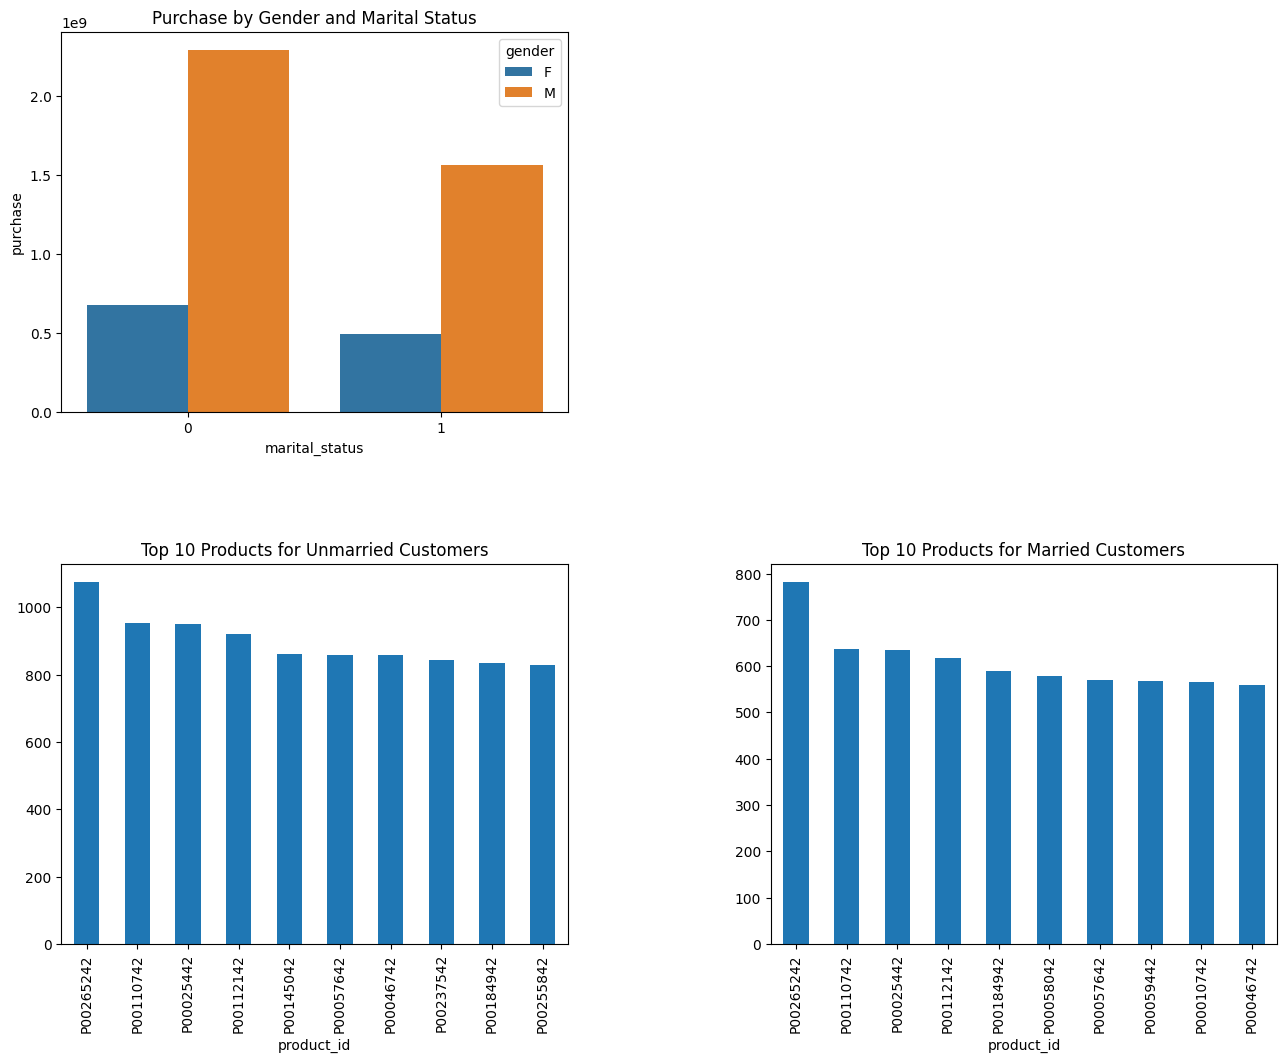

In [45]:
# Group and aggregate purchase by gender and marital status
M_UM_P = df.groupby(['gender', 'marital_status']).agg({'purchase': sum}).reset_index()

# Filter data for unmarried and married individuals and get the top 10 product counts
UM = df[df['marital_status'] == 0]['product_id'].value_counts().nlargest(10)
M = df[df['marital_status'] == 1]['product_id'].value_counts().nlargest(10)

# Create subplots
plt.subplots_adjust(left=0.1, bottom=0.1, right=2, top=2, wspace=0.4, hspace=0.4)

# Subplot 1: Bar plot for purchase by gender and marital status
plt.subplot(2, 2, 1)
sns.barplot(x='marital_status', y='purchase', hue='gender', data=M_UM_P)
plt.title('Purchase by Gender and Marital Status')

# Subplot 2: Bar plot for top 10 products for unmarried customers
plt.subplot(2, 2, 3)
UM.plot(kind='bar')
plt.title('Top 10 Products for Unmarried Customers')

# Subplot 3: Bar plot for top 10 products for married customers
plt.subplot(2, 2, 4)
M.plot(kind='bar')
plt.title('Top 10 Products for Married Customers')
M_UM_P

In the above plot we can see that 'UnMarried' customers purchasing more than the 'Married' customers.

And BarPlot showing that top 10 Product Id's purshased by them frequently.